<a href="https://colab.research.google.com/github/Alijafari1992/Data-Analyst-CapstoneProjects/blob/main/Capston_DataVisualization_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Work with Database**

In [103]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-04-01 17:03:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  37.5MB/s    in 0.9s    

2024-04-01 17:03:59 (37.5 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



In [3]:
#path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"

In [104]:
import sqlite3
conn=sqlite3.connect("m4_survey_data.sqlite") ## open a database connection

How to run sql query

In [105]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


How to list all tables

In [106]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


How to run group by query

In [107]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [108]:
#find how many table we have
QUERY=""" select sql from sqlite_master """
df=pd.read_sql_query(QUERY,conn)
df

,sql
0,"CREATE TABLE ""EduOther"" (\n""Respondent"" INTEGE..."
1,"CREATE TABLE ""DevType"" (\n""Respondent"" INTEGER..."
2,"CREATE TABLE ""LastInt"" (\n""Respondent"" INTEGER..."
3,"CREATE TABLE ""JobFactors"" (\n""Respondent"" INTE..."
4,"CREATE TABLE ""WorkPlan"" (\n""Respondent"" INTEGE..."
5,"CREATE TABLE ""WorkChallenge"" (\n""Respondent"" I..."
6,"CREATE TABLE ""LanguageWorkedWith"" (\n""Responde..."
7,"CREATE TABLE ""LanguageDesireNextYear"" (\n""Resp..."
8,"CREATE TABLE ""DatabaseWorkedWith"" (\n""Responde..."
9,"CREATE TABLE ""DatabaseDesireNextYear"" (\n""Resp..."


How describe a table

In [109]:
table_name = 'master'  # the table you wish to describe
QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)
df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

**Visualizing distribution of data**

Histogram

Plot a histogram of ConvertedComp.

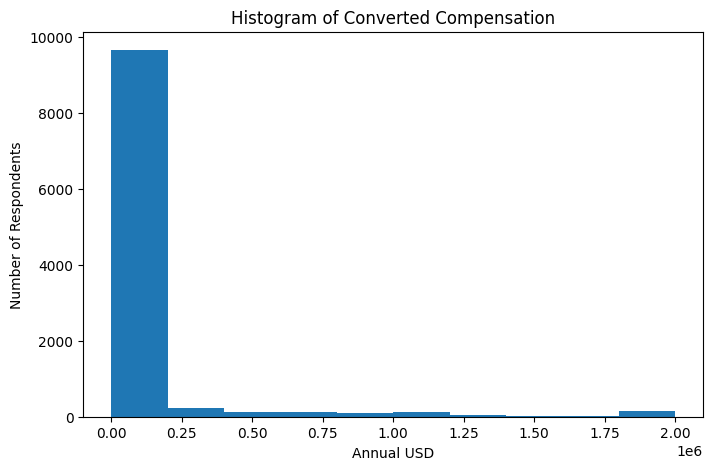

In [112]:
QUERY = """
SELECT Respondent, ConvertedComp
FROM master
"""
df_ConvertedComp = pd.read_sql_query(QUERY,conn)
# plot histogram
df_ConvertedComp['ConvertedComp'].plot(kind='hist', figsize=(8, 5))
# add a title to the histogram
plt.title('Histogram of Converted Compensation')
# add y-label
plt.ylabel('Number of Respondents')
# add x-label
plt.xlabel('Annual USD')

plt.show()

**Box Plot**

Plot a box plot of Age

In [114]:
df_Age=pd.read_sql_query(QUERY,conn)
df_Age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Respondent     11398 non-null  int64  
 1   ConvertedComp  10582 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 178.2 KB


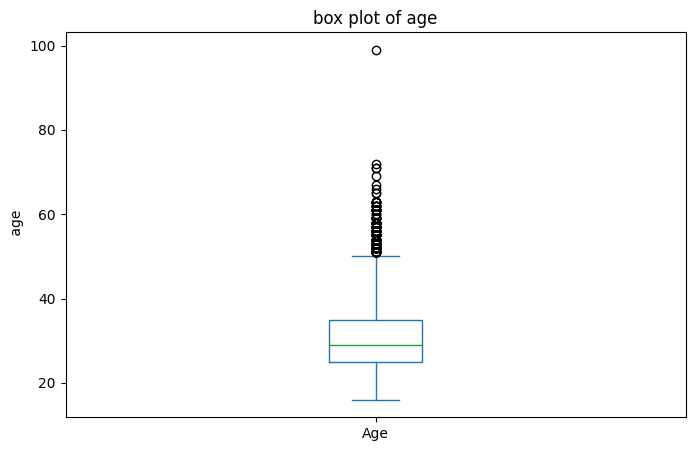

In [115]:
QUERY=""" select age from master """
df_Age=pd.read_sql_query(QUERY,conn)
#box plot
df_Age["Age"].plot(kind="box", figsize=(8,5))
#Add title of boxplot
plt.title("box plot of age")
#Add ylabel
plt.ylabel(" age")
plt.show()

**Visualizing Relationship in data**
Scatter Plots

Create a scatter plot of Age and WorkWeekHrs

In [116]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df_corr = pd.read_sql_query(QUERY,conn)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          11111 non-null  float64
 1   WorkWeekHrs  11276 non-null  float64
dtypes: float64(2)
memory usage: 178.2 KB


In [117]:
df_corr.corr()

,Age,WorkWeekHrs
Age,1.000000,0.036517
WorkWeekHrs,0.036517,1.000000


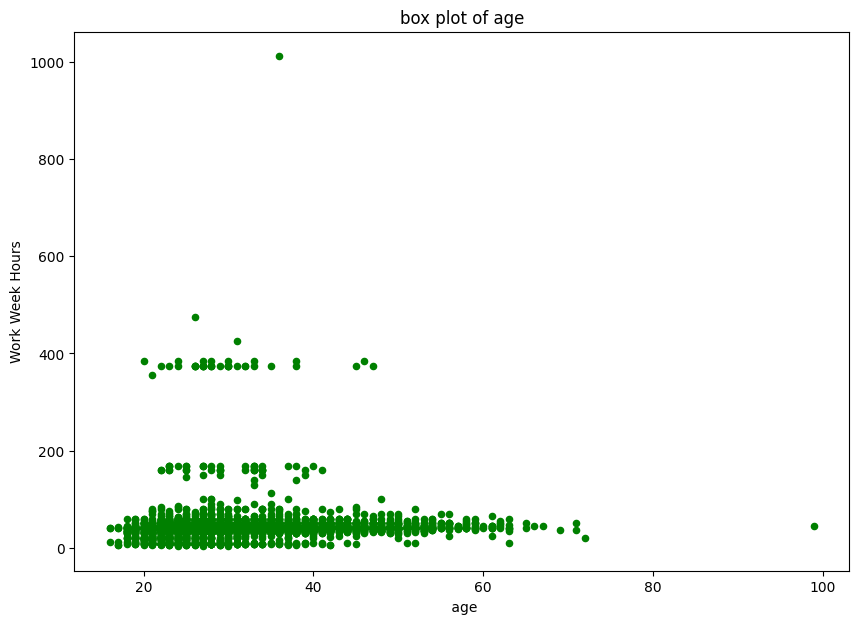

In [118]:
#Scatter Plot
df_corr.plot(kind="scatter",x="Age", y="WorkWeekHrs", figsize=(10,7), color="green")
#Add title of boxplot
plt.title("box plot of age")
#Add ylabel
plt.ylabel("Work Week Hours")
plt.xlabel(" age")
plt.show()

**Bubble plots**

Create a bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size.

In [119]:
QUERY="""SELECT CodeRevHrs, WorkWeekHrs, Age
FROM master"""
df_bubble=pd.read_sql_query(QUERY,conn)
df_bubble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CodeRevHrs   8972 non-null   float64
 1   WorkWeekHrs  11276 non-null  float64
 2   Age          11111 non-null  float64
dtypes: float64(3)
memory usage: 267.3 KB


In [120]:
# normalize Age data
norm_Age = (df_bubble['Age'] - df_bubble['Age'].min()) / (df_bubble['Age'].max() - df_bubble['Age'].min())

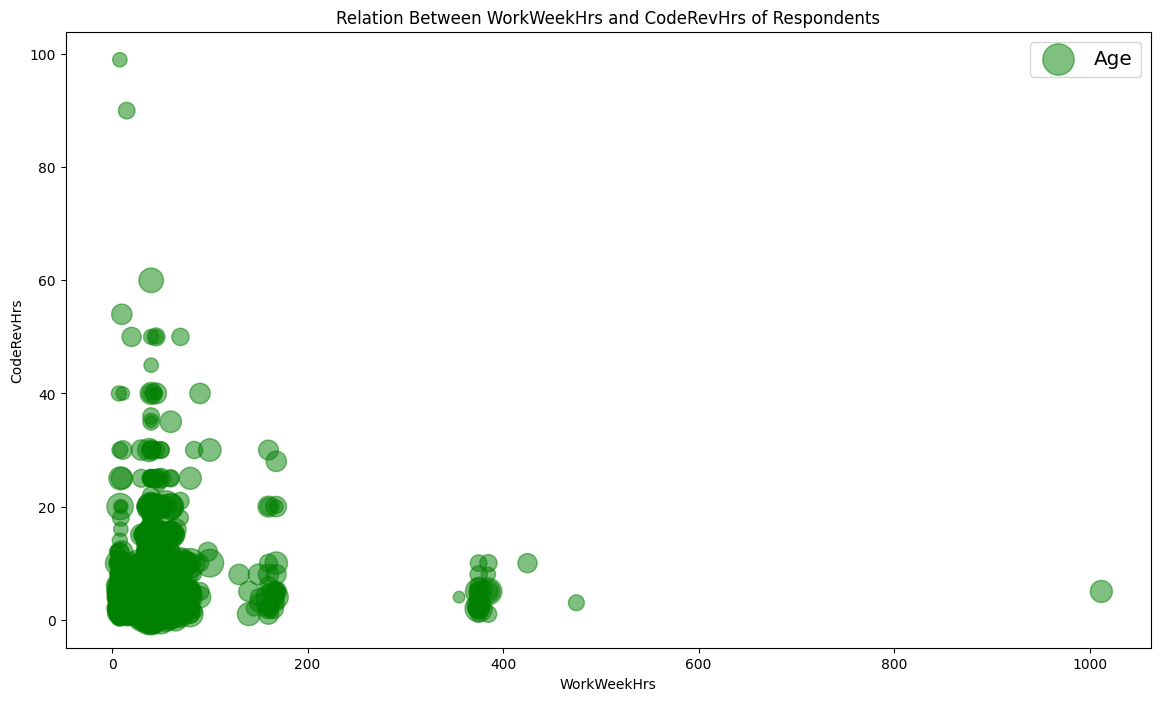

In [121]:
df_bubble.plot(kind='scatter',
               x='WorkWeekHrs',
               y='CodeRevHrs',
               figsize=(14, 8),
               alpha=0.5,  # transparency
               color='green',
               s=norm_Age * 1000 + 10,  # pass in weights
               )

plt.title('Relation Between WorkWeekHrs and CodeRevHrs of Respondents')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.legend(['Age'], loc='upper right', fontsize='x-large')

plt.show()

**Visualizing composition of Data**

Pie Charts

Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart

In [122]:
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df_db = pd.read_sql_query(QUERY,conn)

df_db.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


In [123]:
# group respondents by database and apply count() function
df_groupby = df_db.groupby('DatabaseDesireNextYear', axis=0).count()

df_groupby.sort_values(["Respondent"], ascending=False, inplace=True)

In [124]:
df_pie=df_groupby.head()
df_pie

,Respondent
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


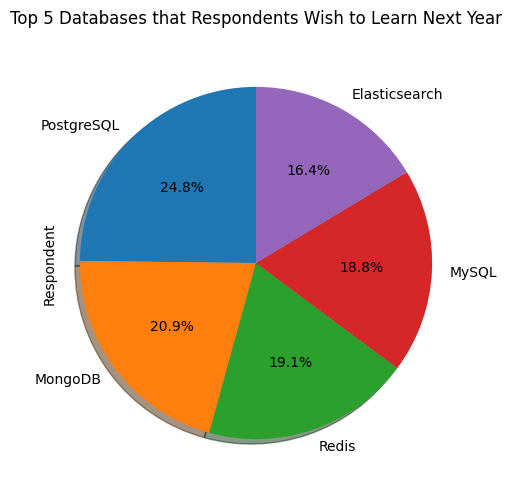

In [125]:
# autopct create %, start angle represent starting point
df_pie['Respondent'].plot(kind='pie',
                          figsize=(5, 6),
                          autopct='%1.1f%%', # add in percentages
                          startangle=90,     # start angle 90°
                          shadow=True,       # add shadow
                          )

plt.title('Top 5 Databases that Respondents Wish to Learn Next Year')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [126]:
QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""
df_lg = pd.read_sql_query(QUERY,conn)

df_lg.head()

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell


In [127]:
# group respondents by language and apply count() function
df_lg = df_lg.groupby('LanguageDesireNextYear', axis=0).count()

df_lg.sort_values(["Respondent"], ascending=False, inplace=True)

In [128]:
df_lg

,Respondent
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088
C#,3591
Bash/Shell/PowerShell,3097
Java,2953
Go,2759


**Stacked Chart**

Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35.

In [129]:
QUERY=""" Select WorkWeekHrs, CodeRevHrs, Age from master"""
df_stacked=pd.read_sql_query(QUERY,conn)
df_stacked.describe()

,WorkWeekHrs,CodeRevHrs,Age
count,11276.000000,8972.000000,11111.000000
mean,42.064606,4.781071,30.779318
std,24.672741,4.567060,7.393680
min,3.000000,0.000000,16.000000
25%,40.000000,2.000000,25.000000
50%,40.000000,4.000000,29.000000
75%,43.000000,5.000000,35.000000
max,1012.000000,99.000000,99.000000


In [130]:
df_stacked = df_stacked.loc[(df_stacked['Age'] >= 30) & (df_stacked['Age'] <= 35)].reset_index().drop(columns=['index'])
df_stacked

,WorkWeekHrs,CodeRevHrs,Age
0,8.0,3.0,31.0
1,40.0,2.0,34.0
2,40.0,2.0,32.0
3,42.0,15.0,34.0
4,40.0,2.0,33.0
...,...,...,...
2937,42.0,4.0,32.0
2938,50.0,2.0,32.0
2939,56.0,14.0,32.0
2940,40.0,5.0,34.0


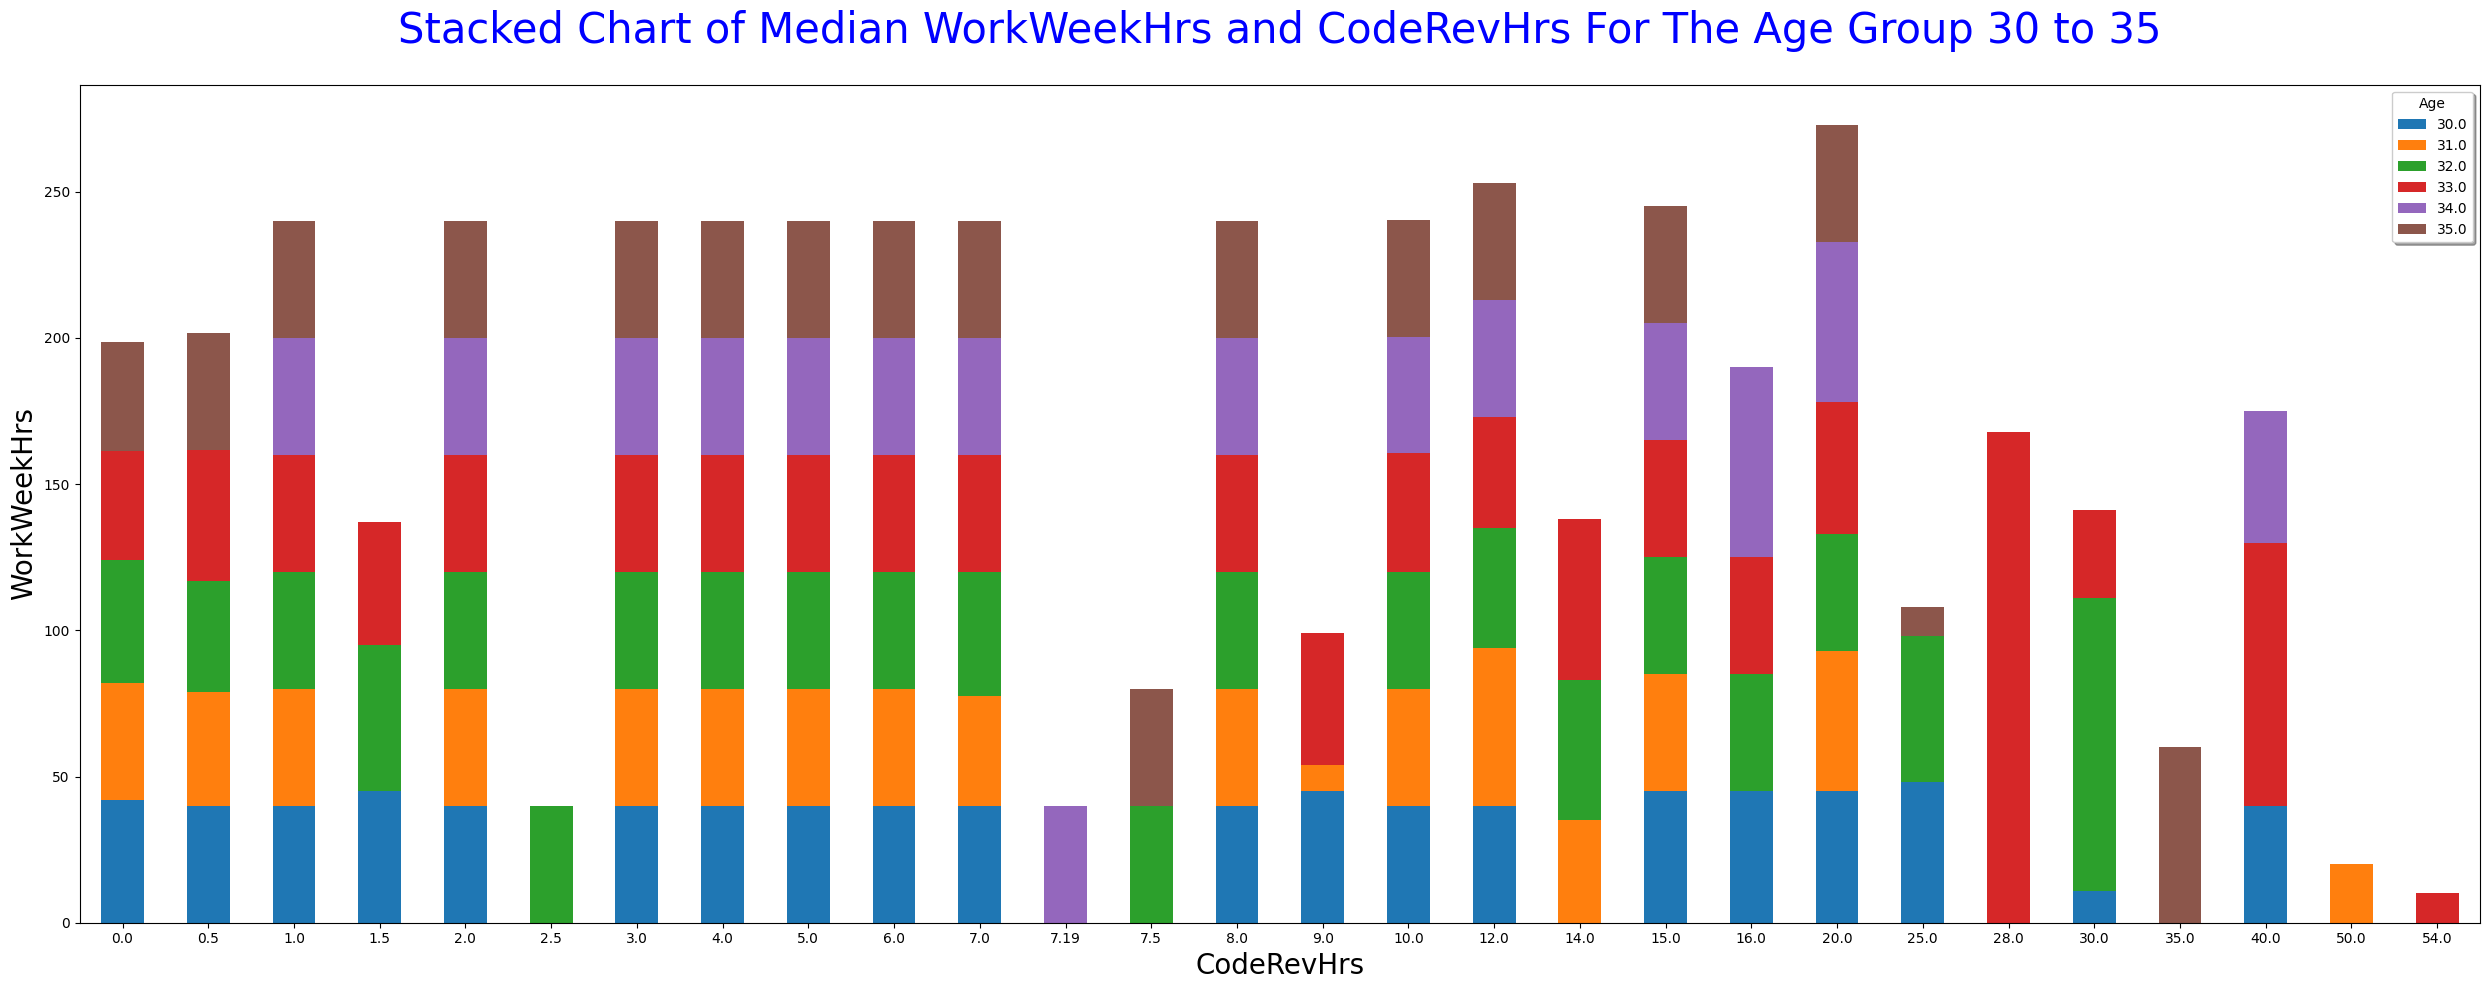

In [131]:
df_stacked.groupby(['CodeRevHrs','Age'])['WorkWeekHrs'].median().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True, figsize=(25, 10))
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs For The Age Group 30 to 35',
          loc='center',pad=30, fontsize=30, color='blue')
plt.xlabel('CodeRevHrs', fontsize = 20)
plt.ylabel('WorkWeekHrs', fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='Age')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Visualizing Comparison of Data**

Line Chart

Plot the median ConvertedComp for all ages from 45 to 60.

In [132]:
QUERY=""" select ConvertedComp,Age from master"""
df_line=pd.read_sql_query(QUERY,conn)
df_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  10582 non-null  float64
 1   Age            11111 non-null  float64
dtypes: float64(2)
memory usage: 178.2 KB


In [133]:
df_line = df_line.loc[(df_line['Age'] >= 40) & (df_line['Age'] <= 45)].reset_index().drop(columns=['index'])
df_line.dropna(inplace=True)
df_line

,ConvertedComp,Age
0,51312.0,44.0
1,156000.0,42.0
2,87996.0,43.0
3,75000.0,42.0
4,46368.0,41.0
...,...,...
760,85000.0,42.0
761,76339.0,45.0
762,14256.0,43.0
763,77022.0,43.0


In [134]:
df_line = df_line.groupby('Age', axis=0).median()
df_line

,ConvertedComp
Age,
40.0,83293.0
41.0,90330.0
42.0,97759.0
43.0,107834.5
44.0,87000.0
45.0,90330.0


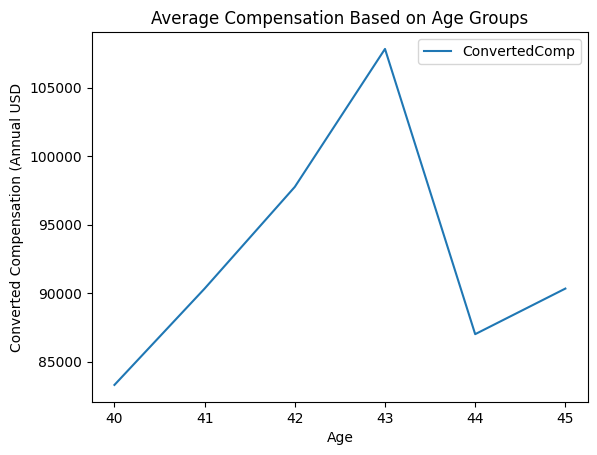

In [135]:
df_line.plot(kind='line')

plt.title('Average Compensation Based on Age Groups')
plt.ylabel('Converted Compensation (Annual USD')
plt.xlabel('Age')

plt.show()

**Bar Chart**

Create a horizontal bar chart using column MainBranch

In [136]:
QUERY = """
SELECT *
FROM DevType
"""
df_bar = pd.read_sql_query(QUERY,conn)

df_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35314 entries, 0 to 35313
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Respondent  35314 non-null  int64 
 1   DevType     35314 non-null  object
dtypes: int64(1), object(1)
memory usage: 551.9+ KB


In [137]:
df_bar.head()

,Respondent,DevType
0,4,"Developer, full-stack"
1,9,Database administrator
2,9,"Developer, back-end"
3,9,"Developer, front-end"
4,9,"Developer, full-stack"


In [138]:
df_bar=df_bar.groupby("DevType", axis=0).count()
df_bar.sort_values(["Respondent"], ascending=True, inplace=True)

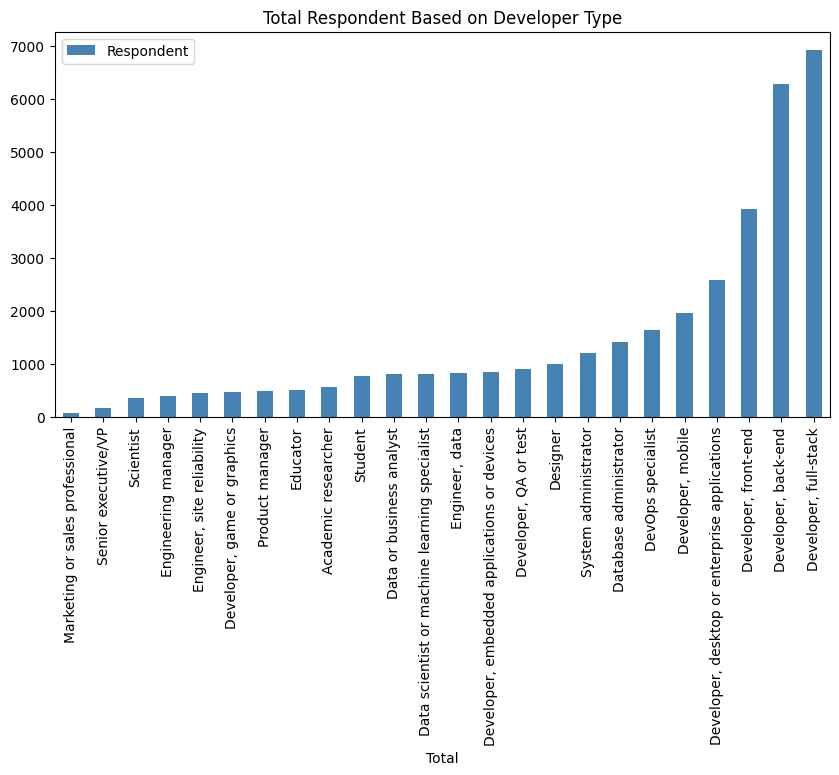

In [139]:
# generate plot
df_bar.plot(kind='bar', figsize=(10, 5), color='steelblue')
plt.xlabel('Total')
plt.title('Total Respondent Based on Developer Type')

plt.show()

In [140]:
conn.close()